# Markov Chain

In [71]:
import pandas as pd
import numpy as np


In [4]:
mon_db = pd.read_csv("/mnt/c/Users/Mustafa/Desktop/Data_Sceince/Spiced/spiced_projects/data/doodl_supermarket/monday.csv",sep=';',parse_dates=True, index_col=1 )

In [5]:
mon_db

,timestamp,location
customer_no,,
1,2019-09-02 07:03:00,dairy
2,2019-09-02 07:03:00,dairy
3,2019-09-02 07:04:00,dairy
4,2019-09-02 07:04:00,dairy
5,2019-09-02 07:04:00,spices
...,...,...
1442,2019-09-02 21:49:00,checkout
1444,2019-09-02 21:49:00,checkout
1445,2019-09-02 21:49:00,dairy


In [6]:
mon_db.timestamp.dtype

dtype('O')

In [7]:
mon_db.dtypes

timestamp    object
location     object
dtype: object

In [8]:
mon_db['timestamp'] = pd.to_datetime(mon_db['timestamp'])

In [9]:
mon_db.dtypes

timestamp    datetime64[ns]
location             object
dtype: object

In [10]:
mon_db.shape

(4884, 2)

In [11]:
mon_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 1 to 1447
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4884 non-null   datetime64[ns]
 1   location   4884 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 114.5+ KB


Calculate the total number of customers in each section

Calculate the total number of customers in each section over time

Display the number of customers at checkout over time

Calculate the time each customer spent in the market

Calculate the total number of customers in the supermarket over time.

Our business managers think that the first section customers visit follows a different pattern than the following ones.
Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

### Calculate the total number of customers in each section

In [12]:
#no duplicates: unique customers
mon_db.drop_duplicates().groupby('location').size()

location
checkout    700
dairy       527
drinks      514
fruit       577
spices      479
dtype: int64

In [13]:
#with duplicates: same customers considered during shpping in different sections
mon_db.groupby('location').size()

location
checkout    1437
dairy        895
drinks       797
fruit       1005
spices       750
dtype: int64

In [14]:
mon_db[mon_db.duplicated() == False]['location'].value_counts()

checkout    700
fruit       577
dairy       527
drinks      514
spices      479
Name: location, dtype: int64

In [15]:
cus_num = mon_db.groupby(mon_db["location"]).count()
cus_num

,timestamp
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


In [16]:
#customers count on a specific section : in checkout for example
cus_num1 = mon_db[mon_db["location"]=="checkout"]["location"].count()
cus_num1

1437

### Calculate the total number of customers in each section over time

In [17]:
mon_h_db=mon_db.copy()
mon_h_db['hour'] = mon_h_db['timestamp'].dt.hour
mon_h_db.groupby(['hour','location'])[['timestamp']].count()

timestamp
hour location           
7    checkout         92
     dairy            59
     drinks           60
     fruit            54
     spices           52
...                  ...
21   checkout         52
     dairy            22
     drinks           28
     fruit            33
     spices           18

[75 rows x 1 columns]

### Display the number of customers at checkout over time

In [18]:
mon_h_db[mon_h_db.location=="checkout"].groupby(['hour', 'location']).size().unstack()

location,checkout
hour,
7,92
8,112
9,85
10,90
11,55
12,73
13,120
14,90
15,94


In [19]:
mon_h_db.groupby('hour')['location'].apply(lambda x: x[x == 'checkout'].count()) #ALSO

hour
7      92
8     112
9      85
10     90
11     55
12     73
13    120
14     90
15     94
16     86
17    122
18    128
19    129
20    109
21     52
Name: location, dtype: int64

### Calculate the total number of customers in the supermarket over time.

In [20]:
last_stat = mon_h_db['timestamp'] == mon_h_db.groupby(['customer_no'])['timestamp'].transform(max)

In [21]:
last_stat

customer_no
1       False
2       False
3       False
4       False
5       False
        ...  
1442     True
1444     True
1445     True
1446     True
1447     True
Name: timestamp, Length: 4884, dtype: bool

In [24]:
mon_h_db[(last_stat==True)]# & (mon_h_db.location=="checkout")]

,timestamp,location,hour
customer_no,,,
1,2019-09-02 07:05:00,checkout,7
5,2019-09-02 07:05:00,checkout,7
2,2019-09-02 07:06:00,checkout,7
3,2019-09-02 07:06:00,checkout,7
8,2019-09-02 07:07:00,checkout,7
...,...,...,...
1442,2019-09-02 21:49:00,checkout,21
1444,2019-09-02 21:49:00,checkout,21
1445,2019-09-02 21:49:00,dairy,21


In [25]:
#correcting the entries with final state abeing not checkout
mon_h_db.location[last_stat] = 'checkout' 
#mon_h_db[mon_h_db['checkout']==False]['location']= 'checkout'

<ipython-input-25-9452a33e8b03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_h_db.location[last_stat] = 'checkout'


In [26]:
mon_h_db[mon_h_db.duplicated()==False].groupby('hour').size()

hour
7     186
8     199
9     188
10    169
11    136
12    183
13    217
14    175
15    197
16    174
17    215
18    238
19    208
20    213
21     94
dtype: int64

### Calculate the time each customer spent in the market

In [27]:
time_left = mon_h_db.groupby('customer_no')['timestamp'].max()#.apply(lambda x: x[x == 'checkout'])
time_entered = mon_h_db.groupby('customer_no')['timestamp'].min()

In [28]:
#mon_h_db['spent_time'] = time_left.dt.time - time_entered.dt.time
time_left - time_entered

customer_no
1      00:02:00
2      00:03:00
3      00:02:00
4      00:04:00
5      00:01:00
         ...   
1443   00:01:00
1444   00:01:00
1445   00:00:00
1446   00:00:00
1447   00:00:00
Name: timestamp, Length: 1447, dtype: timedelta64[ns]

### Our business managers think that the first section customers visit follows a different pattern than the following ones.
Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [29]:
#firsst : first stat(section):
first_stat = mon_h_db['timestamp'] == mon_h_db.groupby(['customer_no'])['timestamp'].transform(min)
#mon_db[mon_db["location"]=="fruit"][mon_db.duplicated==False]["location"].count()

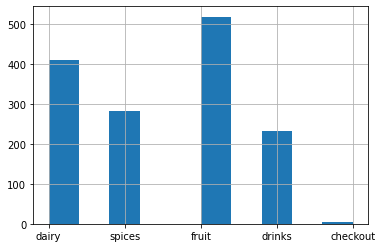

In [31]:
mon_h_db[(first_stat==True)]["location"].hist()

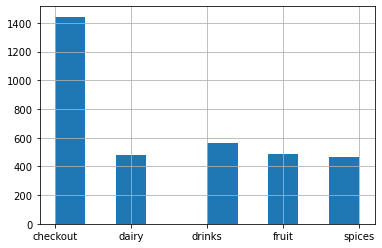

In [32]:
#following :NOT first stat(section):
mon_h_db[(first_stat==False)]['location'].hist()